# Spotify Classification Problem
## Question: How is a song’s genre categorized?
Finding what predictors matter the most when classifying what Genre a song belongs to. 

## Importing Data

In [1]:
# Data Processing
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots 
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm

# Modeling
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis as LDA, 
                                           QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Tree Visualisation
from sklearn.tree import export_graphviz
import graphviz

In [2]:
spotify = pd.read_csv("spotify_songs.csv") 
spotify.head()

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name             playlist_id playlist_genre  ... key  loudness  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   6    -2.634   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...  11    -4.969   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -3.432   
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   7    -3.778   
4     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -4.672   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0583        0.1020          0.000000    0.0653    0.518   
1     1       0.0373        0.0724          0.004210    0.3570    0.693   
2     0       0.0742        0.0794          0.000023    0.1100    0.613   
3     1       0.1020        0.0287          0.000009    0.2040    0.277   
4     1       0.0359        0.0803          0.000000    0.0833    0.725   

     tempo  duration_ms  
0  122.036       194754  
1   99.972       162600  
2  124.008       176616  
3  121.956       169093  
4  123.976       189052  

[5 rows x 23 columns]

## 1 - Cleaning Data
### 1.1 Get rid of all null values

In [3]:
spotify.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [4]:
spotify.isnull().sum(), spotify.shape

(track_id                    0
 track_name                  5
 track_artist                5
 track_popularity            0
 track_album_id              0
 track_album_name            5
 track_album_release_date    0
 playlist_name               0
 playlist_id                 0
 playlist_genre              0
 playlist_subgenre           0
 danceability                0
 energy                      0
 key                         0
 loudness                    0
 mode                        0
 speechiness                 0
 acousticness                0
 instrumentalness            0
 liveness                    0
 valence                     0
 tempo                       0
 duration_ms                 0
 dtype: int64,
 (32833, 23))

In [5]:
# Drop na values in the spotify data
spotify = spotify.dropna()
spotify.isnull().sum(), spotify.shape

(track_id                    0
 track_name                  0
 track_artist                0
 track_popularity            0
 track_album_id              0
 track_album_name            0
 track_album_release_date    0
 playlist_name               0
 playlist_id                 0
 playlist_genre              0
 playlist_subgenre           0
 danceability                0
 energy                      0
 key                         0
 loudness                    0
 mode                        0
 speechiness                 0
 acousticness                0
 instrumentalness            0
 liveness                    0
 valence                     0
 tempo                       0
 duration_ms                 0
 dtype: int64,
 (32828, 23))

### 1.2 - Remove all duplicated values

In [6]:
# Look for any duplicate rows
spotify.duplicated().sum()

0

In [7]:
# Get rid of duplicated values anyways, just in case
spotify = spotify.drop_duplicates()
spotify.duplicated().sum(), spotify.shape

(0, (32828, 23))

## 2 - Data Check
### 2.1 Data Type Check

In [8]:
spotify.dtypes

track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
dtype: object

In [9]:
spotify.describe()

track_popularity  danceability        energy           key  \
count      32828.000000  32828.000000  32828.000000  32828.000000   
mean          42.483551      0.654850      0.698603      5.373949   
std           24.980476      0.145092      0.180916      3.611572   
min            0.000000      0.000000      0.000175      0.000000   
25%           24.000000      0.563000      0.581000      2.000000   
50%           45.000000      0.672000      0.721000      6.000000   
75%           62.000000      0.761000      0.840000      9.000000   
max          100.000000      0.983000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  32828.000000  32828.000000  32828.000000  32828.000000   
mean      -6.719529      0.565737      0.107053      0.175352   
std        2.988641      0.495667      0.101307      0.219644   
min      -46.448000      0.000000      0.000000      0.000000   
25%       -8.171250      0.000000      0.041000      0.015100   
50%       -6.166000      1.000000      0.062500      0.080400   
75%       -4.645000      1.000000      0.132000      0.255000   
max        1.275000      1.000000      0.918000      0.994000   

       instrumentalness      liveness       valence         tempo  \
count      32828.000000  32828.000000  32828.000000  32828.000000   
mean           0.084760      0.190175      0.510556    120.883642   
std            0.224245      0.154313      0.233152     26.903632   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.092700      0.331000     99.961000   
50%            0.000016      0.127000      0.512000    121.984000   
75%            0.004830      0.248000      0.693000    133.918250   
max            0.994000      0.996000      0.991000    239.440000   

         duration_ms  
count   32828.000000  
mean   225796.829779  
std     59836.492346  
min      4000.000000  
25%    187804.500000  
50%    216000.000000  
75%    253581.250000  
max    517810.000000

### 2.2 - Plot unique true_labels (spotify.playlist_genre)

In [10]:
spotify.playlist_genre.unique()

array(['pop', 'rap', 'rock', 'latin', 'r&b', 'edm'], dtype=object)

In [11]:
fig=px.bar(spotify.playlist_genre.value_counts(),color=['red','blue','green','orange','teal','black'], text_auto=True)
fig.update_layout(width = 800)
fig.show()

In [12]:
# Check to see if all songs have a genre
spotify.playlist_genre.isnull().sum() 

0

In [13]:
spotify.playlist_genre.value_counts().sum() == spotify.shape[0]

True

We don't have any null values in the genre column, so no need to remove anything. When we sum the value counts of playlist_genres we see that it matches the number of rows in the dataset as well, meaning that each song has a genre.

### 2.3 - Data Range Check and Correlation Matrix

In [14]:
spotify.max()

track_id                                               7zzZmpw8L66ZPjH1M6qmOs
track_name                                                    하드캐리 Hard Carry
track_artist                                                             香取慎吾
track_popularity                                                          100
track_album_id                                         7zygyMUltFYOvHoT3NOTsj
track_album_name            화양연화 The Most Beautiful Moment In Life: Young ...
track_album_release_date                                           2020-01-29
playlist_name                                               🤩🤪Post Teen Pop🤪🤩
playlist_id                                            7xWuNevFBmwnFEg6wzdCc7
playlist_genre                                                           rock
playlist_subgenre                                          urban contemporary
danceability                                                            0.983
energy                                                          

In [15]:
spotify.min()

track_id                                    0017A6SJgTbfQVU2EtsPNo
track_name                  "I TRIED FOR YEARS... NOBODY LISTENED"
track_artist                                                   !!!
track_popularity                                                 0
track_album_id                              000YOrgQoB5IiiH95Yb8vY
track_album_name                                                 !
track_album_release_date                                1957-01-01
playlist_name                                     "Permanent Wave"
playlist_id                                 0275i1VNfBnsNbPl0QIBpG
playlist_genre                                                 edm
playlist_subgenre                                       album rock
danceability                                                   0.0
energy                                                    0.000175
key                                                              0
loudness                                                   -46

/var/folders/cn/2914x2w5213cm0p8fp564wfm0000gn/T/ipykernel_45442/1504921585.py:3: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



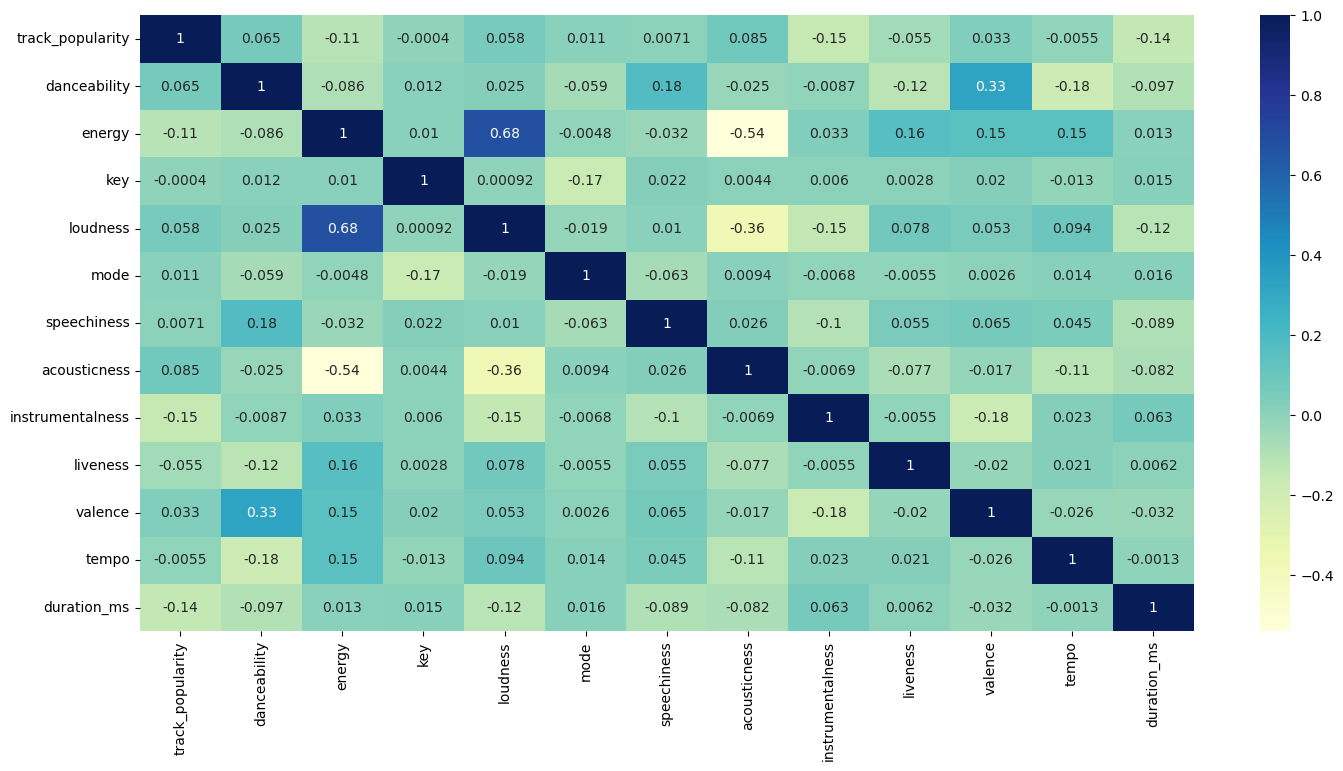

In [16]:
fig,ax= subplots(figsize = (17,8))
sns.heatmap(spotify.corr(numeric_only=True),annot= True, cmap="YlGnBu", ax=ax)
fig.show();

<strong>Correlation Matrix:</strong> There are only a couple predictors that have high linear correlation. This is not the end of the world, as a combination of predictors (3 or more) could have a higher correlation. We can perform PCA to help us observe trends in our multidimensional data.

### 2.4 - <strong>Data Check Conclusion:</strong> All of the values are within an acceptable range as well. After cleaning the data to ensure we can work with all observations we can begin exploring the data a bit more, and split the data into test and training data.
Loudness is in the negatives for the minimum value, which makes sense as loudness is measured in decibals.

## 3 - PCA
Use PCA to reduce the dimensionality of the data

### 3.1 - Normalize numerical columns

In [17]:
# Make a copy of the spotify dataset to only include colums that are numeric. Include the playlist_genre column as well.
spotify_numeric = spotify[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms']].copy()
# Normalize the data
spotify_numeric = StandardScaler().fit_transform(spotify_numeric)
# Convert the normalized data into a dataframe.
spotify_numeric = pd.DataFrame(spotify_numeric, columns=['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms'])
spotify_numeric.head()

danceability    energy       key  loudness      mode  speechiness  \
0      0.642015  1.201668  0.173348  1.367040  0.876132    -0.481253   
1      0.490384  0.643388  1.557808  0.585736  0.876132    -0.688547   
2      0.138877  1.284580 -1.211111  1.100025 -1.141381    -0.324301   
3      0.435246  1.279053  0.450240  0.984251  0.876132    -0.049884   
4     -0.033430  0.742884 -1.211111  0.685114  0.876132    -0.702366   

   acousticness  instrumentalness  liveness   valence     tempo  duration_ms  
0     -0.333961         -0.377985 -0.809246  0.031929  0.042833    -0.518802  
1     -0.468726         -0.359210  1.081094  0.782525 -0.777291    -1.056175  
2     -0.436856         -0.377881 -0.519571  0.439395  0.116133    -0.821933  
3     -0.667687         -0.377943  0.089589 -1.001750  0.039860    -0.947661  
4     -0.432758         -0.377985 -0.692598  0.919777  0.114944    -0.614097

### 3.2 - PCA on Standardized Dataset

In [18]:
# PCA
pca = PCA(n_components=0.85)
scores = pca.fit_transform(spotify_numeric)

#### Add a numerical 'target' column that corresponds to the observations 'playlist_genre' column.
Gives each unique 'playlist_genre' a numerical value and creates a new column named 'target' in the spotify dataframe

In [19]:
# Get unique playlist genres
unique_genres = spotify['playlist_genre'].unique()

# Create a dictionary to map each unique genre to a numerical value
genre_mapping = {genre: i for i, genre in enumerate(unique_genres)}

# Create the 'target' variable using the mapping
spotify['target'] = spotify['playlist_genre'].map(genre_mapping)

# Print the first few rows of the DataFrame to verify the 'target' variable
spotify.head()

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name             playlist_id playlist_genre  ... loudness  mode  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   -2.634     1   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   -4.969     1   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   -3.432     0   
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   -3.778     1   
4     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   -4.672     1   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.0583        0.1020          0.000000    0.0653    0.518  122.036   
1       0.0373        0.0724          0.004210    0.3570    0.693   99.972   
2       0.0742        0.0794          0.000023    0.1100    0.613  124.008   
3       0.1020        0.0287          0.000009    0.2040    0.277  121.956   
4       0.0359        0.0803          0.000000    0.0833    0.725  123.976   

   duration_ms  target  
0       194754       0  
1       162600       0  
2       176616       0  
3       169093       0  
4       189052       0  

[5 rows x 24 columns]

In [20]:
spotify.dtypes

track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
target                        int64
dtype: object

### 3.3 - PCA Visualization

Text(0, 0.5, 'PC2')

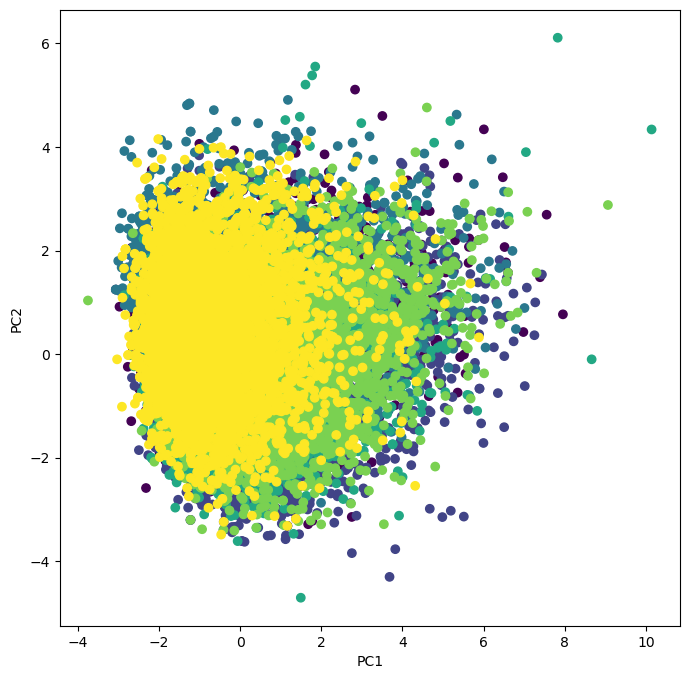

In [21]:
i, j = 0, 1 # which components
fig, ax = subplots(1, 1, figsize=(8, 8)) 
ax.scatter(scores[:,0], scores[:,1], c=spotify.target)
ax.set_xlabel('PC%d' % (i+1)) 
ax.set_ylabel('PC%d' % (j+1))

In [22]:
fig = px.density_heatmap(scores, x=scores[:,0], y=scores[:,1], 
                         nbinsx=100, nbinsy=100, color_continuous_scale="Viridis")
fig.update_layout(
    width=800,  # width in pixels
    height=800,  # height in pixels
)
fig.show()

The following plot is <strong><u>interactive</u></strong>. Please rotate the graph and select different combinations of genres to see a 3D representation of the first 3 PCA components.

In [23]:
fig = px.scatter_3d(scores, x=scores[:,0], y=scores[:,1], z=scores[:,2], color=spotify.playlist_genre, symbol=spotify.playlist_genre)
fig.update_layout(
    width=1200,  # width in pixels
    height=700,  # height in pixels
)
fig.show()

In [24]:
%%capture
fig, axes = subplots(1, 2, figsize=(15, 6)) 
ticks = np.arange(pca.n_components_)+1
ax = axes[0]
ax.plot(ticks, pca.explained_variance_ratio_ , marker='o')
ax.set_xlabel('Principal Component'); 
ax.set_ylabel('Proportion of Variance Explained') 
ax.set_ylim([0,1])
ax.set_xticks(ticks)

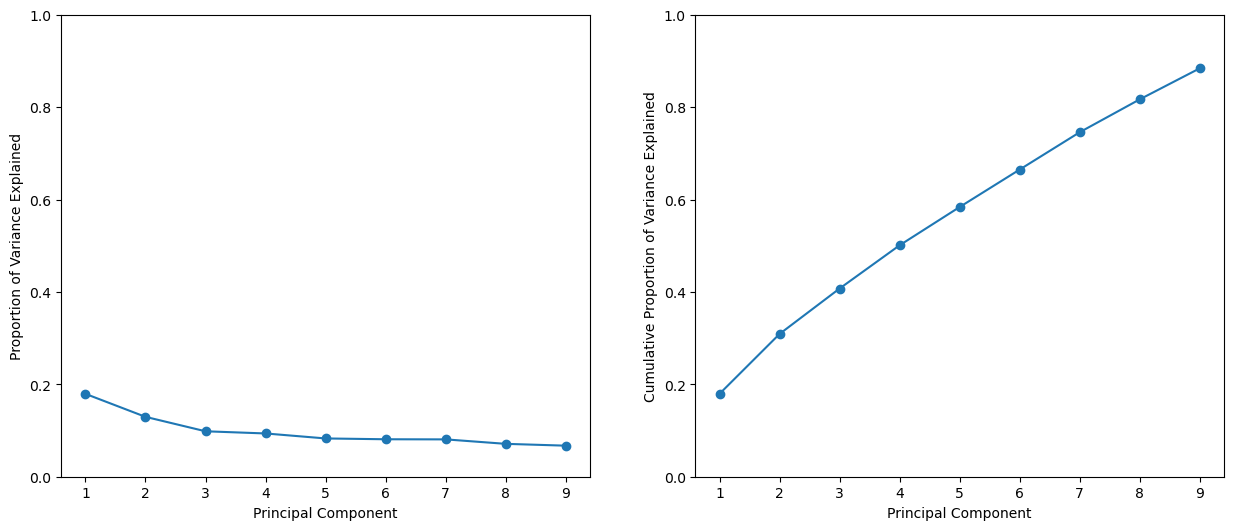

In [25]:
ax = axes[1] 
ax.plot(ticks, pca.explained_variance_ratio_.cumsum(), marker='o')
ax.set_xlabel('Principal Component') 
ax.set_ylabel('Cumulative Proportion of Variance Explained') 
ax.set_ylim([0, 1])
ax.set_xticks(ticks)
fig

## 4 - Spotify Training/Test Split
We will use the train_test_split package to split our data set into a training set, and a test set to see how well our model can predict genre based on a set of predictors.

In [26]:
spotify_numeric['target'] = spotify.target
# Split the data into training and testing sets
spotify_train, spotify_test = train_test_split(spotify_numeric, test_size=0.2, random_state=43)
# Drop the playlist_genre column from the training set and put it into a train_true_labels variable
train_true_labels = spotify_train.target
spotify_train = spotify_train.drop(columns=['target'])
#spotify_train = spotify_train.drop(columns=['playlist_genre'])
# Do the same for the testing set
test_true_labels = spotify_test.target
spotify_test = spotify_test.drop(columns=['target'])
#spotify_test = spotify_test.drop(columns=['playlist_genre'])
spotify_train.head()

danceability    energy       key  loudness      mode  speechiness  \
9164       1.021091  0.212242  1.557808 -0.250777  0.876132     1.490015   
20299     -0.253984  0.245407  0.173348  1.386447 -1.141381     0.335091   
32461      0.917707  0.554948  1.557808  0.100559 -1.141381    -0.554299   
421        0.586876 -0.766128 -0.380435  0.385977 -1.141381    -0.674727   
32332      0.552415  1.378548  0.450240  0.407057  0.876132    -0.474343   

       acousticness  instrumentalness  liveness   valence     tempo  \
9164       0.672226         -0.377985  4.522201 -0.113901 -1.038636   
20299      2.192889         -0.377958 -0.305717  0.336456  2.198152   
32461      0.385395         -0.377947 -0.975793  1.691819  0.116579   
421       -0.015259         -0.377985 -0.767771 -1.301988 -0.364292   
32332     -0.796812          3.425951  0.640425  1.215726  0.265929   

       duration_ms  
9164      0.423430  
20299     0.792190  
32461    -1.243772  
421       0.654095  
32332    -0.844745

In [27]:
# make train_true_labels a numpy array
train_true_labels_array = np.array(train_true_labels)
test_true_labels_array = np.array(test_true_labels)
# make train_true_labels_array have all integer values
train_true_labels_array = train_true_labels_array.astype(int)
test_true_labels_array = test_true_labels_array.astype(int)
# make train_true_labels equal to train_true_labels_array as a pandas.core.series.Series
train_true_labels = pd.Series(train_true_labels_array)
test_true_labels = pd.Series(test_true_labels_array)


/var/folders/cn/2914x2w5213cm0p8fp564wfm0000gn/T/ipykernel_45442/2562969295.py:5: RuntimeWarning:

invalid value encountered in cast

/var/folders/cn/2914x2w5213cm0p8fp564wfm0000gn/T/ipykernel_45442/2562969295.py:6: RuntimeWarning:

invalid value encountered in cast



## 5 - Data Test (Without PCA)
Classify playlist_genre using numerical predictors with Logistic Regression (OVR and Multinomial), LDA, QDA, Gaussian Naive Bayes, and Random Forests without PCA.

### 5.1 - Logistic Regression (OVR)

In [28]:
# OVR Logistic Regression on the training set
LRModelOVR = LogisticRegression(penalty=None, multi_class='ovr').fit(spotify_train, train_true_labels)
LRpredictOVR_train = LRModelOVR.predict(spotify_train)
LRpredictOVR_test = LRModelOVR.predict(spotify_test)

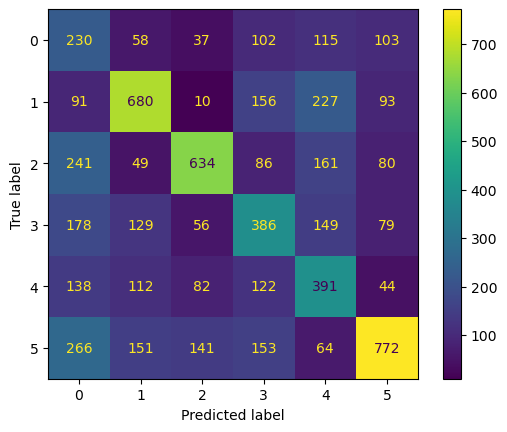

In [29]:
cm = confusion_matrix(LRpredictOVR_test, test_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [30]:
print(np.mean(LRpredictOVR_test == test_true_labels), np.mean(LRpredictOVR_test != test_true_labels))

0.47106305208650623 0.5289369479134938


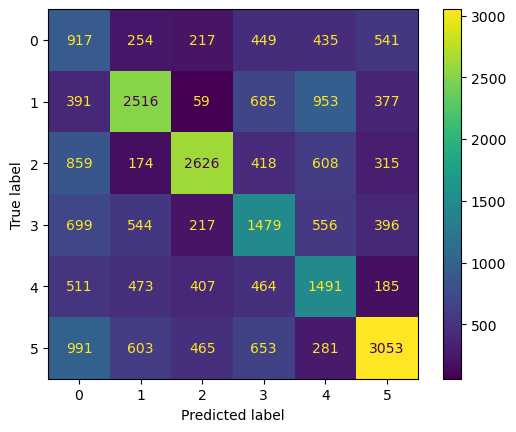

In [31]:
cm = confusion_matrix(LRpredictOVR_train, train_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [32]:
print(np.mean(LRpredictOVR_train == train_true_labels), np.mean(LRpredictOVR_train != train_true_labels))

0.46005635519000837 0.5399436448099916


### 5.2 - Logistic Regression (Multinomial)

In [33]:
LRModelMulti = LogisticRegression(penalty=None, multi_class='multinomial').fit(spotify_train, train_true_labels)
LRpredictMulti_train = LRModelMulti.predict(spotify_train)
LRpredictMulti_test = LRModelMulti.predict(spotify_test)

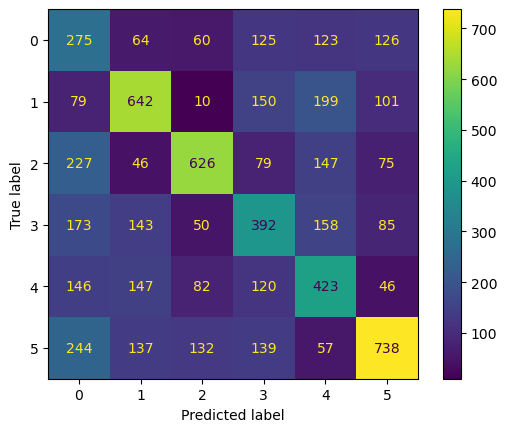

In [34]:
cm = confusion_matrix(LRpredictMulti_test, test_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [35]:
print(np.mean(LRpredictMulti_test == test_true_labels), np.mean(LRpredictMulti_test != test_true_labels))

0.47151995126408774 0.5284800487359123


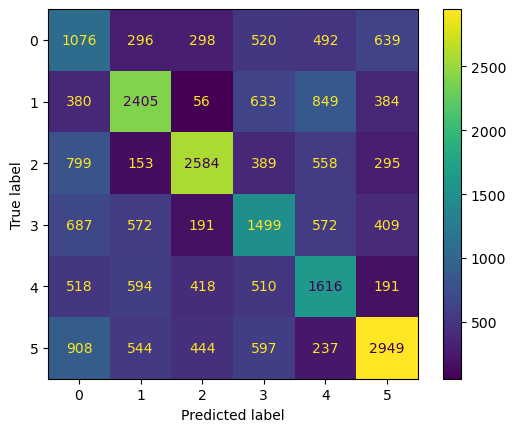

In [36]:
cm = confusion_matrix(LRpredictMulti_train, train_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [37]:
print(np.mean(LRpredictMulti_train == train_true_labels), np.mean(LRpredictMulti_train != train_true_labels))

0.4618460132510852 0.5381539867489148


### 5.3 - Linear Discriminant Analysis (LDA)

In [38]:
lda = LDA(store_covariance=True)
LDAModel = lda.fit(spotify_train, train_true_labels)
LDApredict_test = LDAModel.predict(spotify_test)
LDApredict_train = LDAModel.predict(spotify_train)

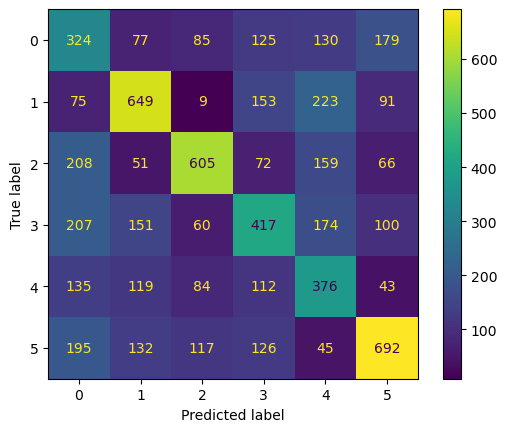

In [39]:
cm = confusion_matrix(LDApredict_test, test_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [40]:
print(np.mean(LDApredict_test == test_true_labels), np.mean(LDApredict_test != test_true_labels))

0.46649406031069146 0.5335059396893086


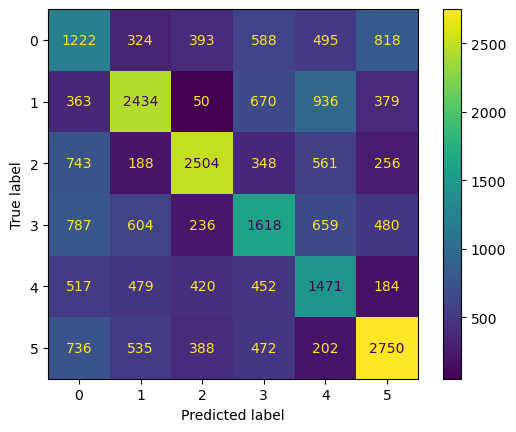

In [41]:
cm = confusion_matrix(LDApredict_train, train_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [42]:
print(np.mean(LDApredict_train == train_true_labels), np.mean(LDApredict_train != train_true_labels))

0.45689589520980883 0.5431041047901911


### 5.4 - Quadratic Discriminant Analysis (QDA)

In [43]:
qda = QDA(store_covariance=True)
qda.fit(spotify_train, train_true_labels)
qda_pred_test = qda.predict(spotify_test)
qda_pred_train = qda.predict(spotify_train)

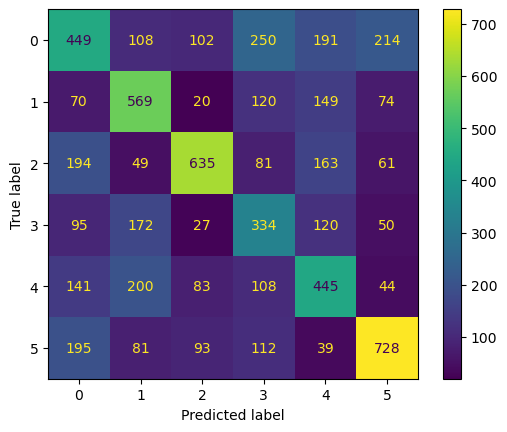

In [44]:
cm = confusion_matrix(qda_pred_test, test_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [45]:
print(np.mean(qda_pred_test == test_true_labels), np.mean(qda_pred_test != test_true_labels))

0.4812671337191593 0.5187328662808407


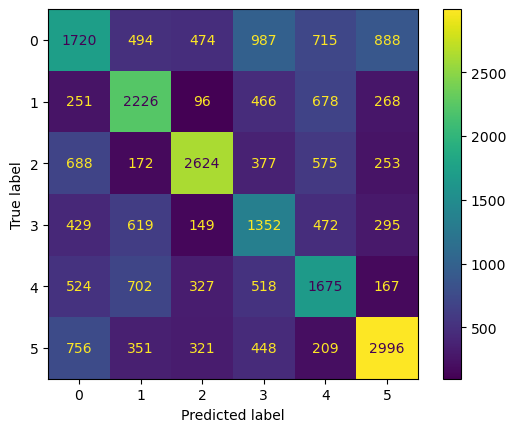

In [46]:
cm = confusion_matrix(qda_pred_train, train_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [47]:
print(np.mean(qda_pred_train == train_true_labels), np.mean(qda_pred_train != train_true_labels))

0.4795141268753332 0.5204858731246668


### 5.5 - Gaussian Naive Bayes (GNB)

In [48]:
GNB = GaussianNB()
GNB.fit(spotify_train, train_true_labels)
GNB_pred_test = GNB.predict(spotify_test)
GNB_pred_train = GNB.predict(spotify_train)

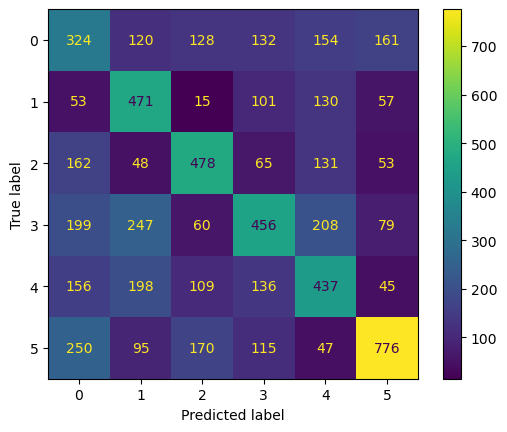

In [49]:
cm = confusion_matrix(GNB_pred_test, test_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [50]:
print(np.mean(GNB_pred_test == test_true_labels), np.mean(GNB_pred_test != test_true_labels))

0.4480657934815717 0.5519342065184283


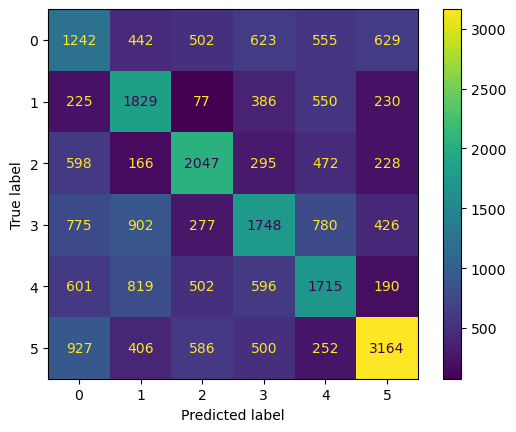

In [51]:
cm = confusion_matrix(GNB_pred_train, train_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [52]:
print(np.mean(GNB_pred_train == train_true_labels), np.mean(GNB_pred_train != train_true_labels))

0.44722412611377654 0.5527758738862234


### 5.6 - K Nearest Neighbors (KNN) with K = 1

In [53]:
knn1 = KNeighborsClassifier(n_neighbors=1) 
knn1.fit(spotify_train, train_true_labels)
knn1_pred_test = knn1.predict(spotify_test)
knn1_pred_train = knn1.predict(spotify_train)

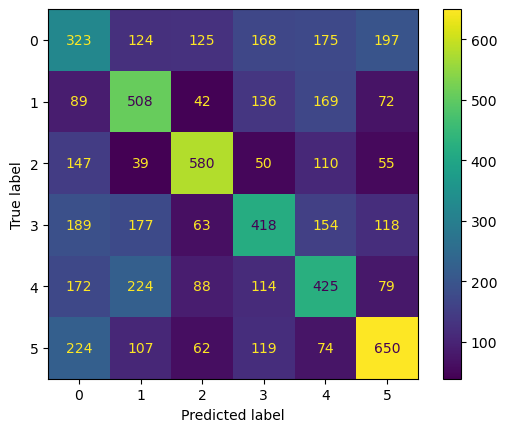

In [54]:
cm = confusion_matrix(knn1_pred_test, test_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [55]:
print(np.mean(knn1_pred_test == test_true_labels), np.mean(knn1_pred_test != test_true_labels))

0.44227840389887296 0.557721596101127


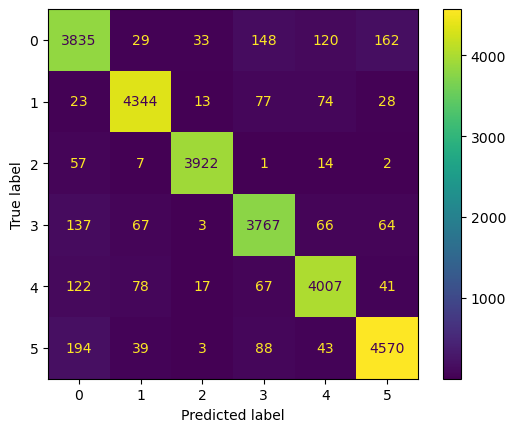

In [56]:
cm = confusion_matrix(knn1_pred_train, train_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [57]:
print(np.mean(knn1_pred_train == train_true_labels), np.mean(knn1_pred_train != train_true_labels))

0.9308125809153911 0.06918741908460894


### 5.7 - K Nearest Neighbors (KNN) with K = 3

In [58]:
knn3 = KNeighborsClassifier(n_neighbors=3) 
knn3.fit(spotify_train, train_true_labels)
knn3_pred_test = knn1.predict(spotify_test)
knn3_pred_train = knn1.predict(spotify_train)

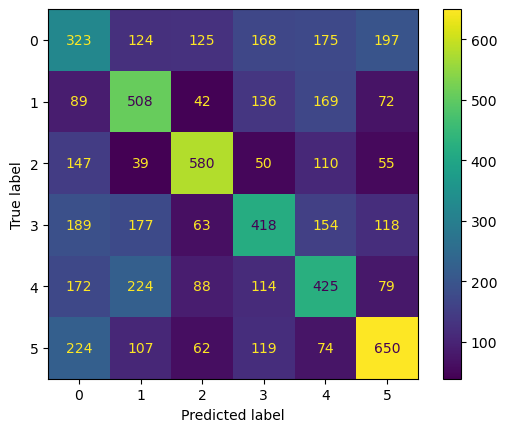

In [59]:
cm = confusion_matrix(knn3_pred_test, test_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [60]:
print(np.mean(knn3_pred_test == test_true_labels), np.mean(knn3_pred_test != test_true_labels))

0.44227840389887296 0.557721596101127


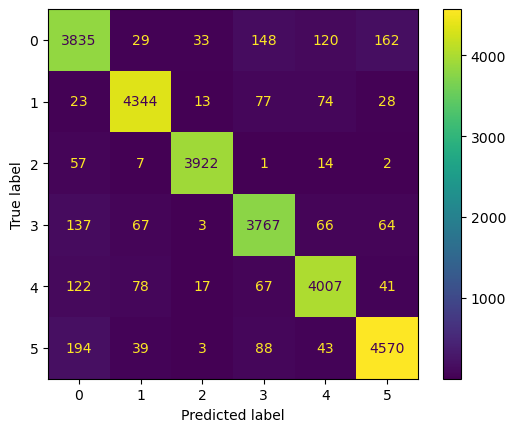

In [61]:
cm = confusion_matrix(knn3_pred_train, train_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [62]:
print(np.mean(knn3_pred_train == train_true_labels), np.mean(knn3_pred_train != train_true_labels))

0.9308125809153911 0.06918741908460894


### 5.8 - KNN Plot of K=1 to K=20

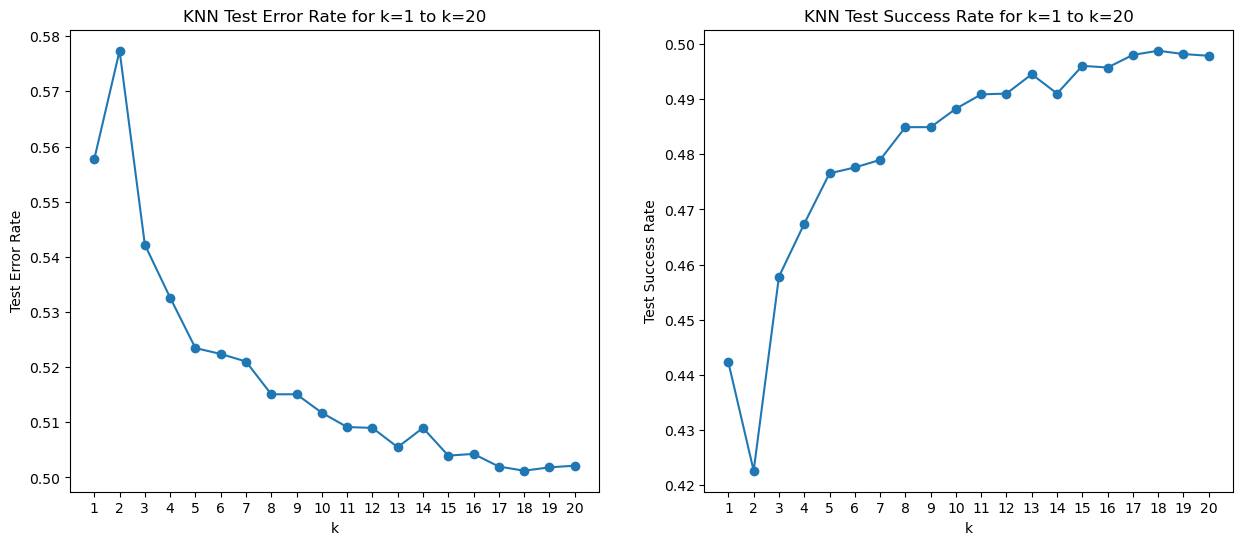

In [63]:
# KNN algorithm for k=1 to k=20 and plots the test error rate for each k
fig, axes = subplots(1, 2, figsize=(15, 6))
ax = axes[0]
ticks = np.arange(1, 21)
knn_test_error = []
for k in ticks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(spotify_train, train_true_labels)
    knn_pred_test = knn.predict(spotify_test)
    knn_test_error.append(np.mean(knn_pred_test != test_true_labels))
ax.plot(ticks, knn_test_error, marker='o')
ax.set_xlabel('k')
ax.set_ylabel('Test Error Rate')
ax.set_xticks(ticks)
ax.set_title('KNN Test Error Rate for k=1 to k=20')

ax = axes[1]
knn_test_success = []
for k in ticks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(spotify_train, train_true_labels)
    knn_pred_test = knn.predict(spotify_test)
    knn_test_success.append(np.mean(knn_pred_test == test_true_labels))
ax.plot(ticks, knn_test_success, marker='o')
ax.set_xlabel('k')
ax.set_ylabel('Test Success Rate')
ax.set_xticks(ticks)
ax.set_title('KNN Test Success Rate for k=1 to k=20');

### 5.9 - Random Forest

In [64]:
rf = RandomForestClassifier()
rf.fit(spotify_train, train_true_labels)

RandomForestClassifier()

In [65]:
y_pred_RF = rf.predict(spotify_test)
accuracy_score(test_true_labels, y_pred_RF)

0.5630520865062443

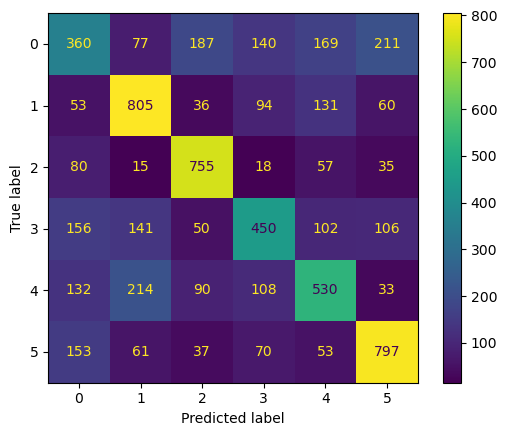

In [66]:
cm = confusion_matrix(test_true_labels, y_pred_RF)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

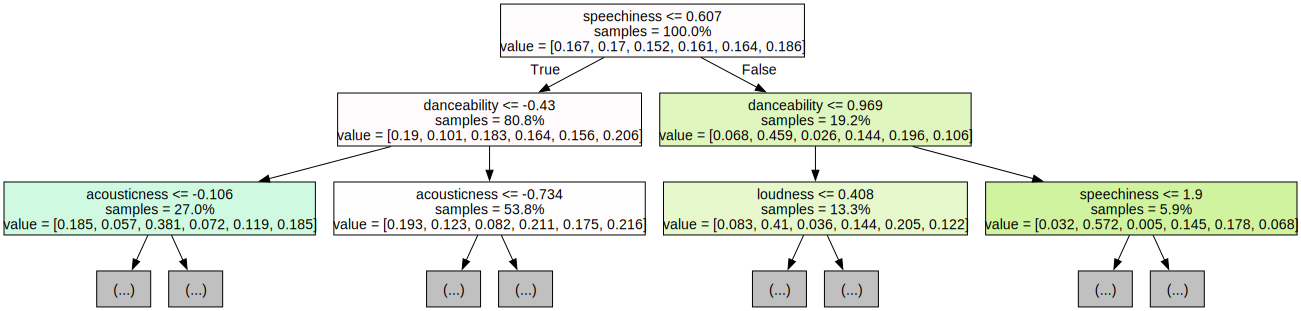

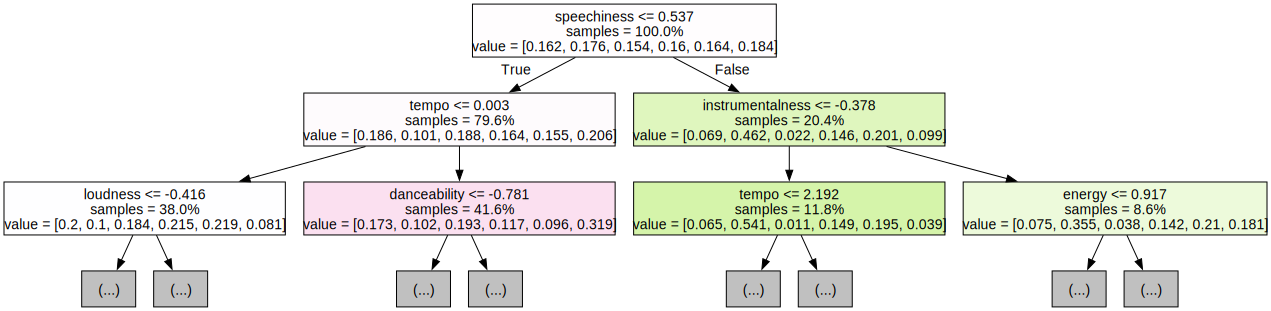

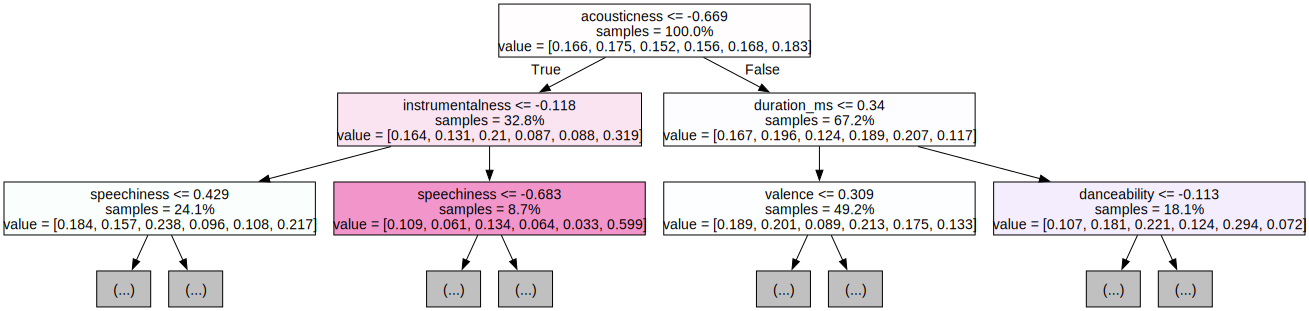

In [67]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=spotify_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

### 5.10 - Hyperparameter tuning (Random Forest)

In [127]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(spotify_train, train_true_labels)

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 16, 'n_estimators': 279}


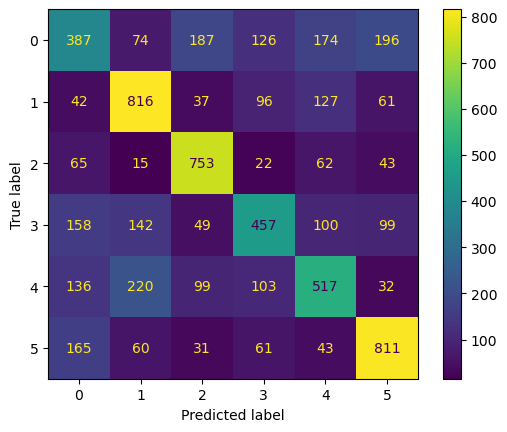

In [ ]:
# Generate predictions with the best model
y_pred = best_rf.predict(spotify_test)

# Create the confusion matrix
cm = confusion_matrix(test_true_labels, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
print(np.mean(y_pred == test_true_labels), np.mean(y_pred != test_true_labels))

0.569753274444106 0.430246725555894


### 5.11 Random Forest (Bagging Classifier)

In [72]:
tree = DecisionTreeClassifier(min_samples_leaf=7) #min_samples_split=11

In [73]:
ens_model = BaggingClassifier(estimator=tree, n_estimators=100, 
                                  bootstrap=True,
                                  bootstrap_features=True,     # RF
                                  oob_score=True,                     
                                  random_state=0).fit(spotify_train, train_true_labels)

print('oob score =', ens_model.oob_score_)

pred = ens_model.predict(spotify_test)

oob score = 0.5475972888584266


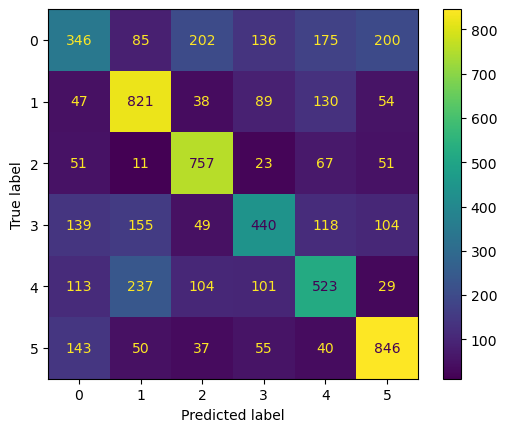

In [74]:
cm = confusion_matrix(test_true_labels, pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [75]:
accuracy_score(test_true_labels, pred)

0.568534876637222

## 6 - PCA Train/Test Split

In [76]:
# Convert scores to a DataFrame
scores_df = pd.DataFrame(scores)
# Add the target variable to the DataFrame
scores_df['target'] = spotify.target
# Split the data into training and testing sets
scores_train, scores_test = train_test_split(scores_df, test_size=0.2, random_state=43)
# Drop the target variable from the training set and put it into a train_true_labels variable
scores_train_true_labels = scores_train.target
scores_train = scores_train.drop(columns=['target'])
# Do the same for the testing set
scores_test_true_labels = scores_test.target
scores_test = scores_test.drop(columns=['target'])
scores_train.head()

0         1         2         3         4         5         6  \
9164  -0.173039 -0.731844  1.039669  1.600789  3.345435  2.652835 -1.089209   
20299 -0.258960 -0.002642  0.779918  1.199394 -0.210021 -1.219363  1.504034   
32461 -0.286847 -2.053724  1.186364 -0.484811 -0.850186 -1.376345 -0.226717   
421    0.572241  0.248733  0.495621 -0.665231 -0.383297 -0.555076 -0.383099   
32332 -1.509120  0.289398  0.088547 -1.540555 -1.351247  2.220541  0.076983   

              7         8  
9164   1.354376  1.333707  
20299  0.259786 -1.078169  
32461  1.330747 -0.470565  
421   -1.605888 -0.528855  
32332  2.543002  0.215220

In [77]:
# make train_true_labels a numpy array
train_true_labels_array = np.array(scores_train_true_labels)
test_true_labels_array = np.array(scores_test_true_labels)
# make train_true_labels_array have all integer values
train_true_labels_array = train_true_labels_array.astype(int)
test_true_labels_array = test_true_labels_array.astype(int)
# make train_true_labels equal to train_true_labels_array as a pandas.core.series.Series
scores_train_true_labels = pd.Series(train_true_labels_array)
scores_test_true_labels = pd.Series(test_true_labels_array)


/var/folders/cn/2914x2w5213cm0p8fp564wfm0000gn/T/ipykernel_45442/3611611191.py:5: RuntimeWarning:

invalid value encountered in cast

/var/folders/cn/2914x2w5213cm0p8fp564wfm0000gn/T/ipykernel_45442/3611611191.py:6: RuntimeWarning:

invalid value encountered in cast



## 7 - Data Test with PCA

### 7.1 - Logistic Regression (OVR)

In [78]:
# OVR Logistic Regression on the training set
LRModelOVR = LogisticRegression(penalty=None, multi_class='ovr').fit(scores_train, scores_train_true_labels)
LRpredictOVR_train = LRModelOVR.predict(scores_train)
LRpredictOVR_test = LRModelOVR.predict(scores_test)

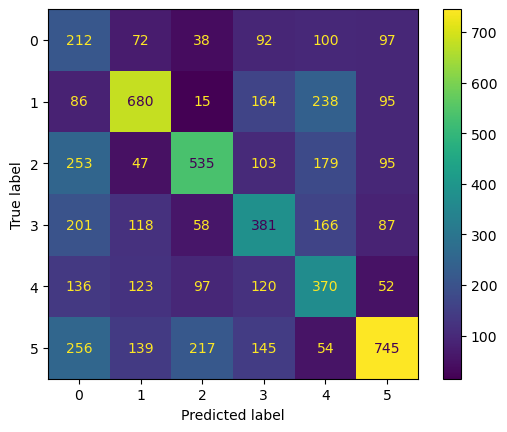

In [79]:
cm = confusion_matrix(LRpredictOVR_test, scores_test_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [80]:
accuracy_score(scores_test_true_labels, LRpredictOVR_test)

0.44517209869022234

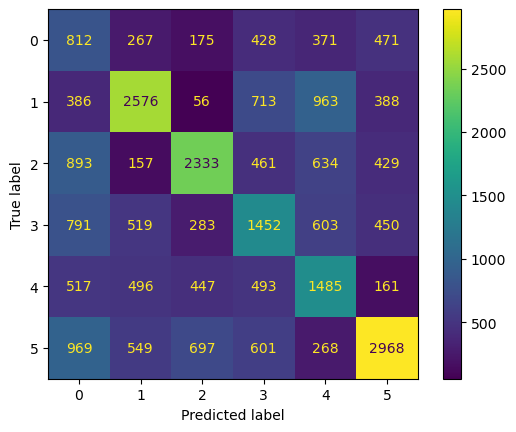

In [81]:
cm = confusion_matrix(LRpredictOVR_train, scores_train_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [82]:
accuracy_score(scores_train_true_labels, LRpredictOVR_train)

0.44269286421445436

### 7.2 - Logistic Regression (Multinomial)

In [83]:
LRModelMulti = LogisticRegression(penalty=None, multi_class='multinomial').fit(scores_train, scores_train_true_labels)
LRpredictMulti_train = LRModelMulti.predict(scores_train)
LRpredictMulti_test = LRModelMulti.predict(scores_test)

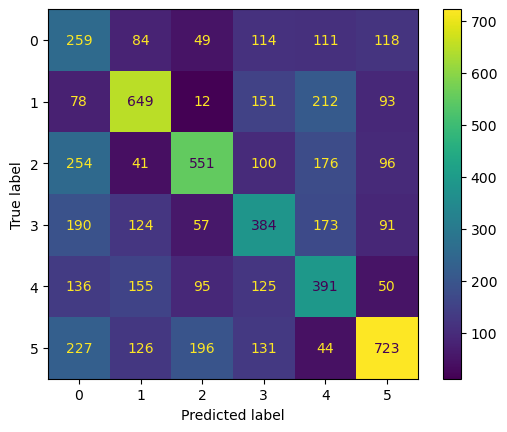

In [84]:
cm = confusion_matrix(LRpredictMulti_test, scores_test_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [85]:
accuracy_score(scores_test_true_labels, LRpredictMulti_test)

0.45035028936947913

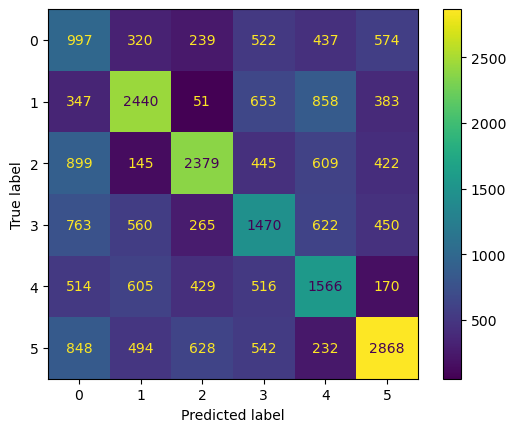

In [86]:
cm = confusion_matrix(LRpredictMulti_train, scores_train_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [87]:
accuracy_score(scores_train_true_labels, LRpredictMulti_train)

0.44627218033660804

### 7.3 - Linear Discriminant Analysis (LDA)

In [88]:
lda = LDA(store_covariance=True)
LDAModel = lda.fit(scores_train, scores_train_true_labels)
LDApredict_test = LDAModel.predict(scores_test)
LDApredict_train = LDAModel.predict(scores_train)

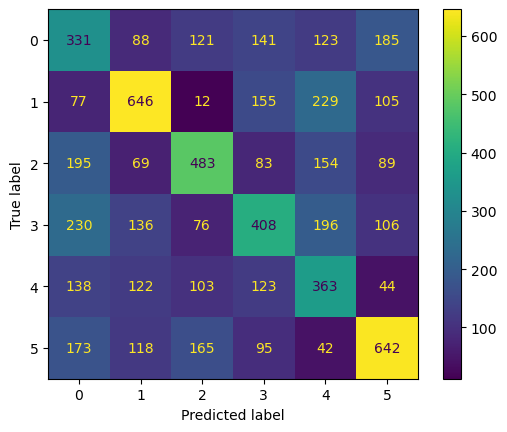

In [89]:
cm = confusion_matrix(LDApredict_test, scores_test_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [90]:
accuracy_score(scores_test_true_labels, LDApredict_test)

0.4375571123971977

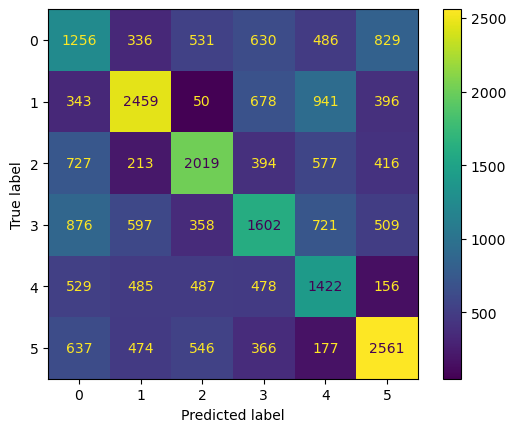

In [91]:
cm = confusion_matrix(LDApredict_train, scores_train_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [92]:
accuracy_score(scores_train_true_labels, LDApredict_train)

0.4310029700708248

### 7.4 - Quadratic Discriminant Analysis (QDA)

In [93]:
qda = QDA(store_covariance=True)
qda.fit(scores_train, scores_train_true_labels)
qda_pred_test = qda.predict(scores_test)
qda_pred_train = qda.predict(scores_train)

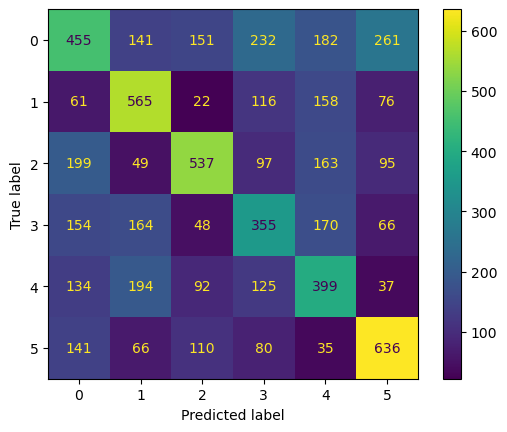

In [94]:
cm = confusion_matrix(qda_pred_test, scores_test_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [95]:
accuracy_score(scores_test_true_labels, qda_pred_test)

0.4488272921108742

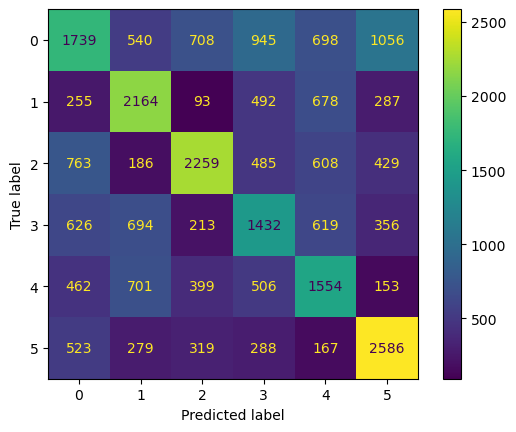

In [96]:
cm = confusion_matrix(qda_pred_train, scores_train_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [97]:
accuracy_score(scores_train_true_labels, qda_pred_train)

0.4468052699718224

### 7.5 - Gaussian Naive Bayes (GNB)

In [98]:
GNB = GaussianNB()
GNB.fit(scores_train, scores_train_true_labels)
GNB_pred_test = GNB.predict(scores_test)
GNB_pred_train = GNB.predict(scores_train)

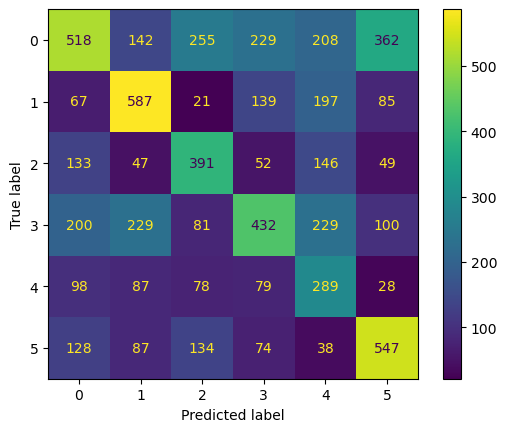

In [99]:
cm = confusion_matrix(GNB_pred_test, scores_test_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [100]:
accuracy_score(scores_test_true_labels, GNB_pred_test)

0.4209564422784039

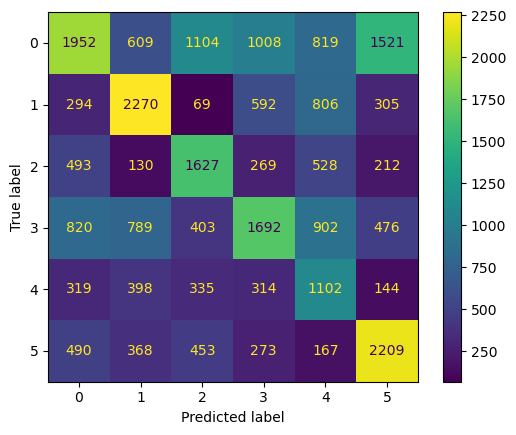

In [101]:
cm = confusion_matrix(GNB_pred_train, scores_train_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [102]:
accuracy_score(scores_train_true_labels, GNB_pred_train)

0.4132206229533166

### 7.6 - K Nearest Neighbors (KNN) with K = 1

In [103]:
knn1 = KNeighborsClassifier(n_neighbors=1) 
knn1.fit(scores_train, scores_train_true_labels)
knn1_pred_test = knn1.predict(scores_test)
knn1_pred_train = knn1.predict(scores_train)

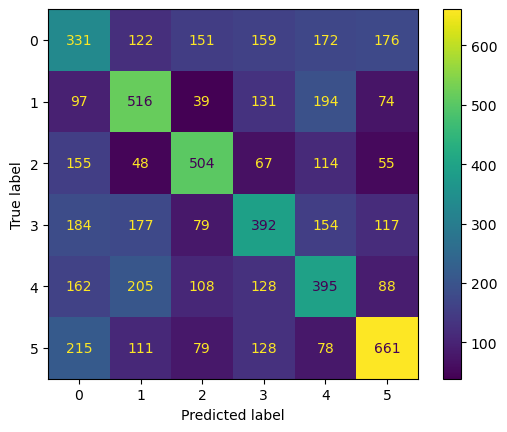

In [104]:
cm = confusion_matrix(knn1_pred_test, scores_test_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [105]:
accuracy_score(scores_test_true_labels, knn1_pred_test)

0.4262869326835212

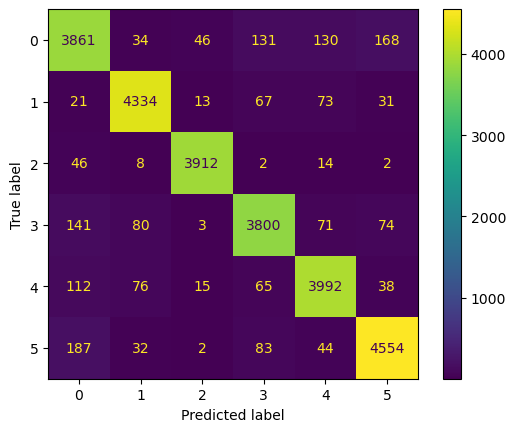

In [106]:
cm = confusion_matrix(knn1_pred_train, scores_train_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [107]:
accuracy_score(scores_train_true_labels, knn1_pred_train)

0.931117203564085

### 7.7 - K Nearest Neighbors (KNN) with K = 3

In [108]:
knn3 = KNeighborsClassifier(n_neighbors=3) 
knn3.fit(scores_train, scores_train_true_labels)
knn3_pred_test = knn1.predict(scores_test)
knn3_pred_train = knn1.predict(scores_train)

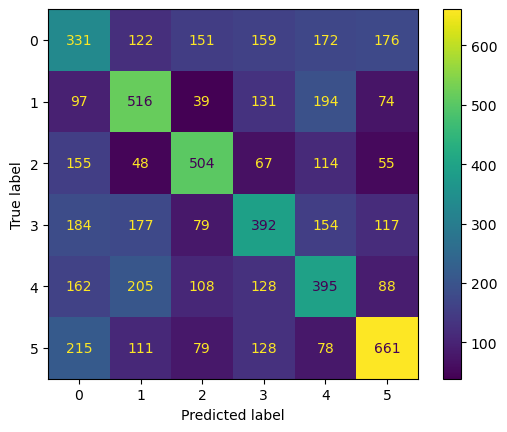

In [109]:
cm = confusion_matrix(knn3_pred_test, scores_test_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [110]:
accuracy_score(scores_test_true_labels, knn3_pred_test)

0.4262869326835212

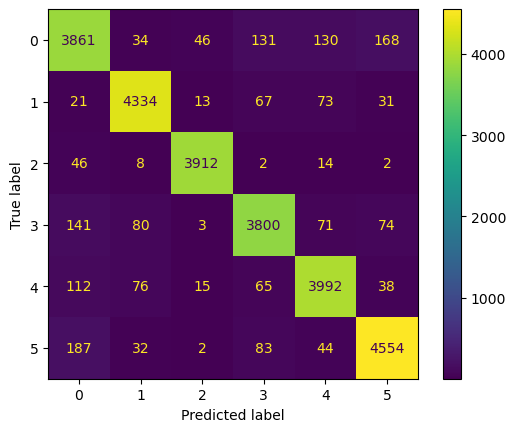

In [111]:
cm = confusion_matrix(knn3_pred_train, scores_train_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [112]:
accuracy_score(scores_train_true_labels, knn3_pred_train)

0.931117203564085

### 7.8 - KNN Plot of K=1 to K=20

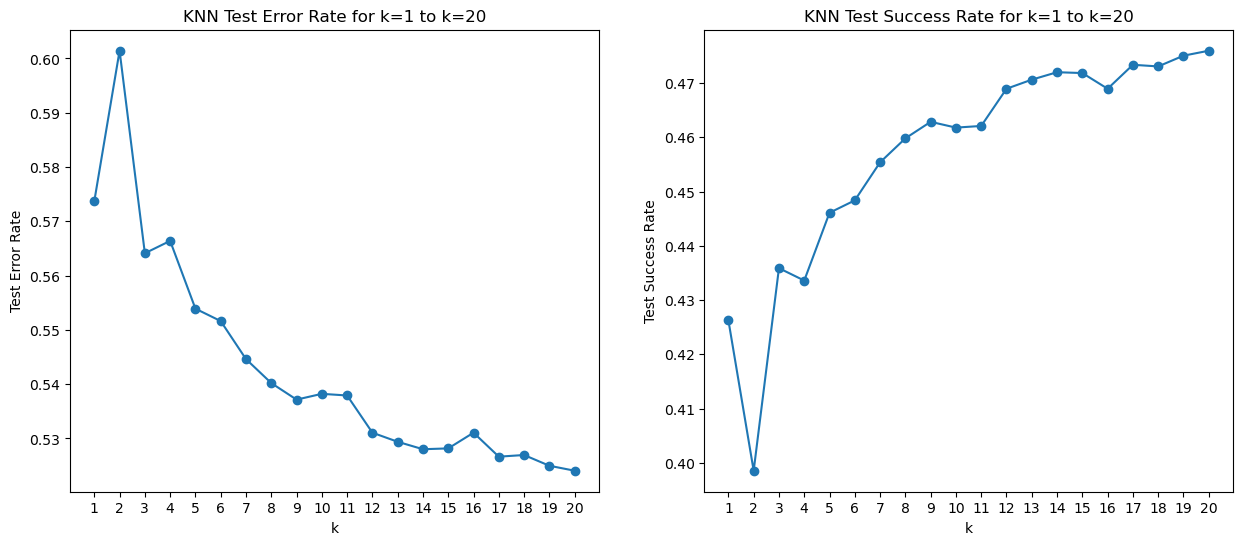

In [113]:
# KNN algorithm for k=1 to k=20 and plots the test error rate for each k
fig, axes = subplots(1, 2, figsize=(15, 6))
ax = axes[0]
ticks = np.arange(1, 21)
knn_test_error = []
for k in ticks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scores_train, scores_train_true_labels)
    knn_pred_test = knn.predict(scores_test)
    knn_test_error.append(np.mean(knn_pred_test != scores_test_true_labels))
ax.plot(ticks, knn_test_error, marker='o')
ax.set_xlabel('k')
ax.set_ylabel('Test Error Rate')
ax.set_xticks(ticks)
ax.set_title('KNN Test Error Rate for k=1 to k=20')

ax = axes[1]
knn_test_success = []
for k in ticks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scores_train, scores_train_true_labels)
    knn_pred_test = knn.predict(scores_test)
    knn_test_success.append(np.mean(knn_pred_test == scores_test_true_labels))
ax.plot(ticks, knn_test_success, marker='o')
ax.set_xlabel('k')
ax.set_ylabel('Test Success Rate')
ax.set_xticks(ticks)
ax.set_title('KNN Test Success Rate for k=1 to k=20');

### 7.9 - Random Forest

In [114]:
rf = RandomForestClassifier()
rf.fit(scores_train, scores_train_true_labels)

RandomForestClassifier()

In [115]:
y_pred_RF = rf.predict(scores_test)
accuracy_score(scores_test_true_labels, y_pred_RF)

0.500304599451721

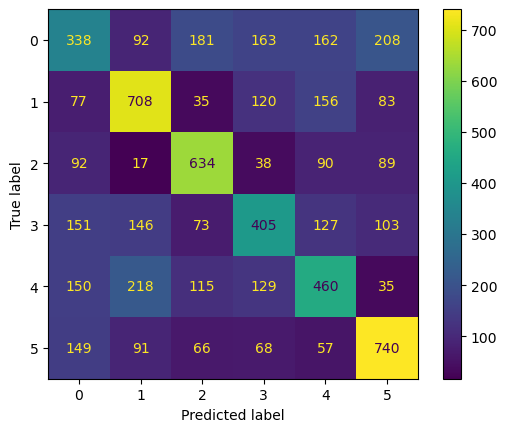

In [116]:
cm = confusion_matrix(scores_test_true_labels, y_pred_RF)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

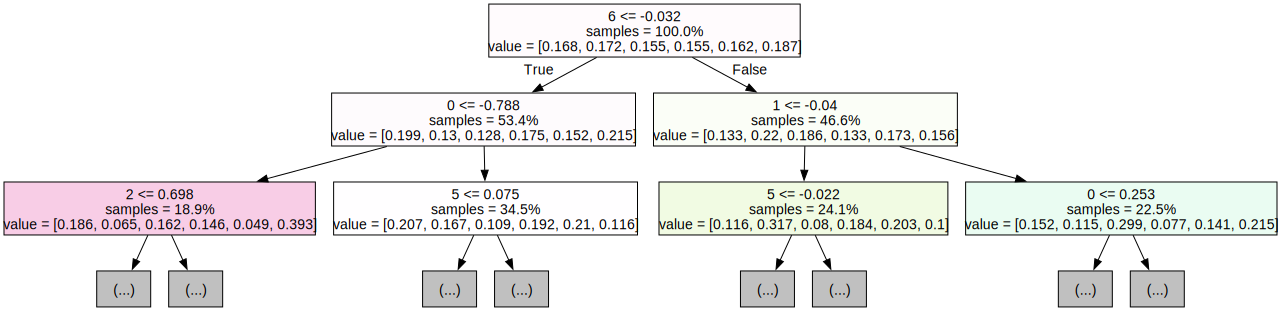

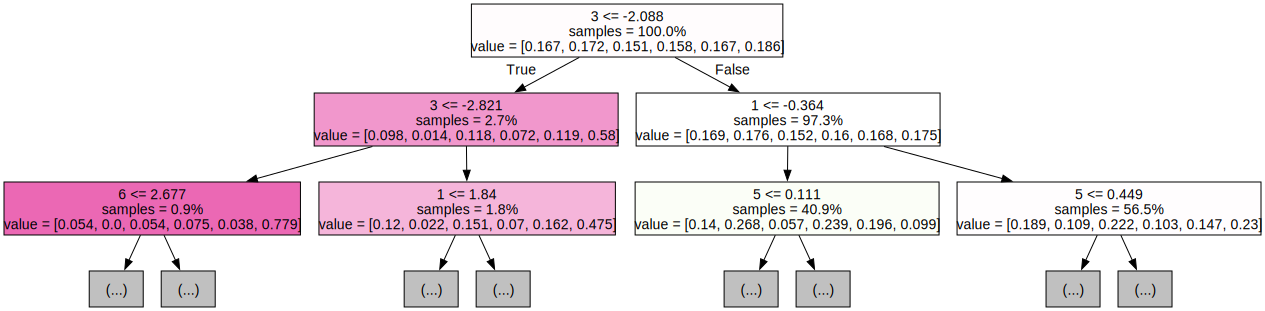

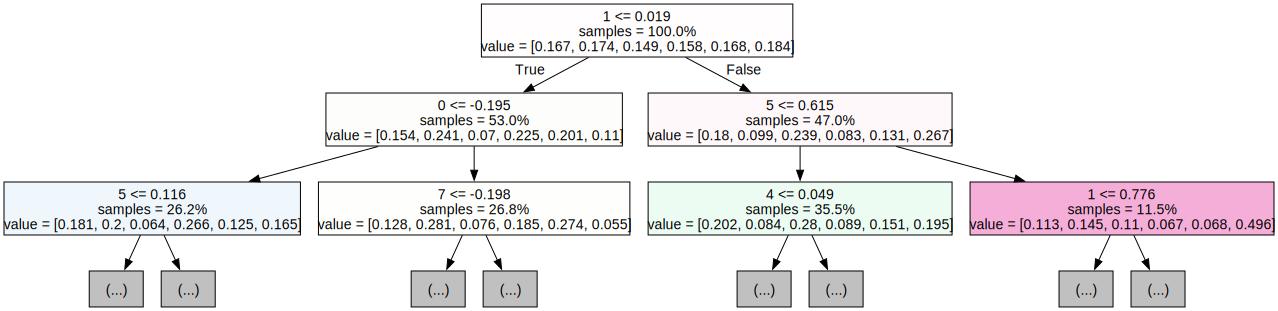

In [117]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=scores_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

### 7.10 - Hyperparameter tuning (Random Forest)

In [118]:
# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(scores_train, scores_train_true_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x284581590>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x2878be6d0>})

In [119]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 16, 'n_estimators': 458}


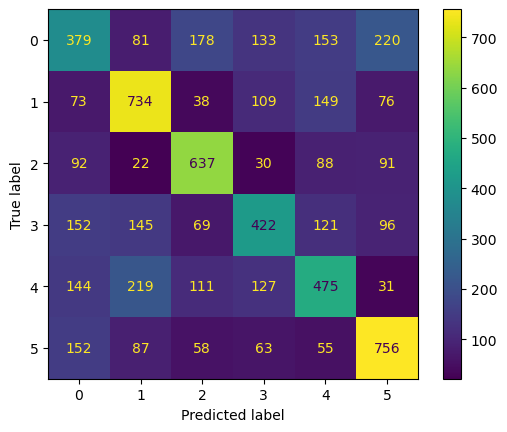

In [120]:
# Generate predictions with the best model
y_pred = best_rf.predict(scores_test)

# Create the confusion matrix
cm = confusion_matrix(scores_test_true_labels, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [121]:
accuracy_score(scores_test_true_labels, y_pred)

0.5182759671032592

### 7.11 Random Forest (Bagging Classifier)

In [122]:
tree = DecisionTreeClassifier(min_samples_leaf=7) #min_samples_split=11

In [123]:
ens_model = BaggingClassifier(estimator=tree, n_estimators=100, 
                                  bootstrap=True,
                                  bootstrap_features=True,     # RF
                                  oob_score=True,                     
                                  random_state=0).fit(scores_train, scores_train_true_labels)

print('oob score =', ens_model.oob_score_)

pred = ens_model.predict(scores_test)

oob score = 0.4862539029776864


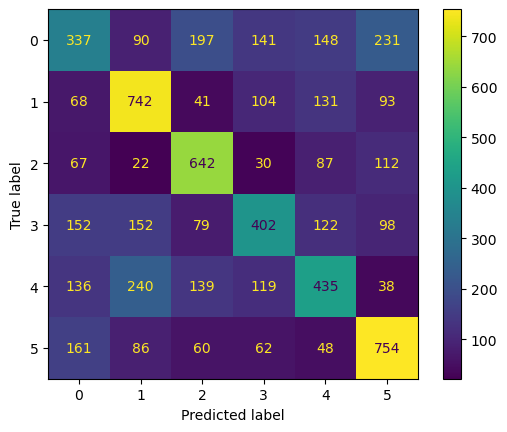

In [124]:
cm = confusion_matrix(scores_test_true_labels, pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [125]:
accuracy_score(scores_test_true_labels, pred)

0.5044166920499543